# Time Series Forecast with Basic RNN

* Dataset is downloaded from https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

In [17]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('data/pm25.csv')

print(df.shape)
df.head()

(43824, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [9]:
df.isnull().sum()*100/df.shape[0]

No       0.000000
year     0.000000
month    0.000000
day      0.000000
hour     0.000000
pm2.5    4.716594
DEWP     0.000000
TEMP     0.000000
PRES     0.000000
cbwd     0.000000
Iws      0.000000
Is       0.000000
Ir       0.000000
dtype: float64

In [10]:
df.dropna(subset=['pm2.5'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [13]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(
    lambda row: datetime.datetime(year=row['year'], 
                                  month=row['month'], day=row['day'],hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [21]:
df['year'].value_counts()

2013    8678
2014    8661
2012    8295
2010    8091
2011    8032
Name: year, dtype: int64

Text(0, 0.5, 'pm2.5 readings')

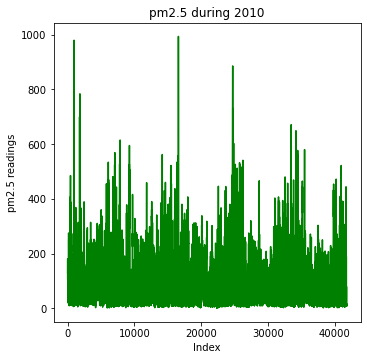

In [20]:
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(data=df['pm2.5'], color='g')
g.set_title('pm2.5 during 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')